<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate linear regression

Explore the data synthesis and outcome! Based on the lecture material we should be able to understand the following related to least-squares-fitting:

- R-squared
- (F-statistic)
- coef
- std err
- t
- P>|t|

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          2.983e+04
Date:                Sun, 03 Sep 2023   Prob (F-statistic):                        0.00
Time:                        14:16:00   Log-Likelihood:                         -15364.
No. Observations:                5050   AIC:                                  3.073e+04
Df Residuals:                    5048   BIC:                                  3.074e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

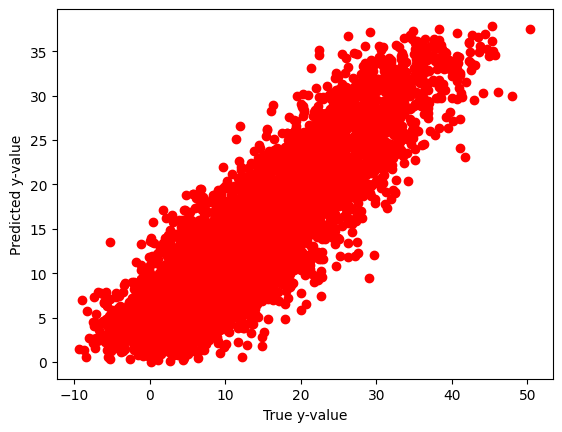

In [1]:
import statsmodels.api as sm
import numpy as np
import itertools as iter
import matplotlib.pyplot as plt

# Generate a set of predictor variables
span = np.linspace(0, 10, 100)
x=list( iter.combinations_with_replacement(span,2))
x=np.array(x)

# Generate the corresponding responce variables
y = 3 * x[:,0]  + 0.1 * x[:,1]**2 + np.random.randn(len(x[:,1])) * 5

# Perform least square fit
est = sm.OLS(y,x).fit()
print(est.summary())
y_pred=est.predict(x)

plt.xlabel("True y-value")
plt.ylabel("Predicted y-value")
plt.scatter(y, y_pred, color='red')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     8128.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:16:16   Log-Likelihood:                -15319.
No. Observations:                5050   AIC:                         3.064e+04
Df Residuals:                    5047   BIC:                         3.066e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0852      0.209    -14.731      0.0

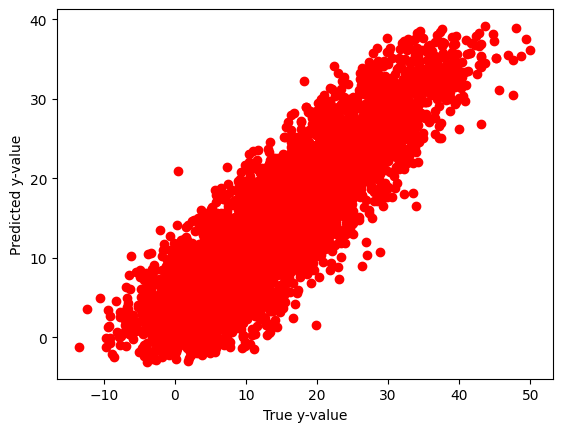

In [2]:
import statsmodels.api as sm
import numpy as np
import itertools as iter

# Generate a set of predictor variables
span = np.linspace(0, 10, 100)
x=list( iter.combinations_with_replacement(span,2))
x=np.array(x)

# Generate the corresponding responce variables
y = 3 * x[:,0]  + 0.1 * x[:,1]**2 + np.random.randn(len(x[:,1])) * 5

# To include intercept we use this function
x  = sm.add_constant(x)

# Perform least square fit
est = sm.OLS(y,x).fit()
print(est.summary())
y_pred=est.predict(x)

plt.xlabel("True y-value")
plt.ylabel("Predicted y-value")
plt.scatter(y, y_pred, color='red')


# Ridge regression
Compare the results to the example above.

Write a simple routine to calcualte the R-squared value using the ridge_reg_pred and y arrays.

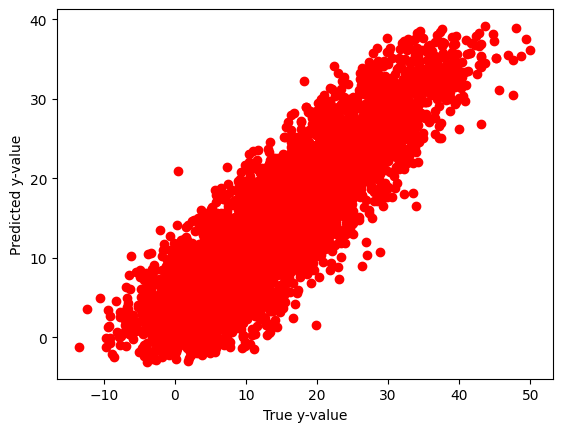

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import PolynomialFeatures
X=x
# Ridge regression
lamb=1.0
ridge_reg = Ridge(alpha=lamb)  # You can adjust the regularization parameter (alpha) as needed
ridge_reg.fit(X, y)
ridge_reg_pred = ridge_reg.predict(X)

plt.xlabel("True y-value")
plt.ylabel("Predicted y-value")
#plt.scatter(X, y, label='Data')
plt.scatter(y, ridge_reg_pred, color='red', label=f'Ridge Regression (lamdba={lamb})')


# Kernel ridge regression with RBF
What happens here!?
How can the prediction be so good?

Task #1: Go back and repeat the exercise using a one-dimensional plot and make a scatter-plot with the real xy-data and the model xy-data.

Task #2: Partition the data into 80% fitting and 20% validation and see see how well the various models perform. Explore the gamma parameter and try to explain what you see...

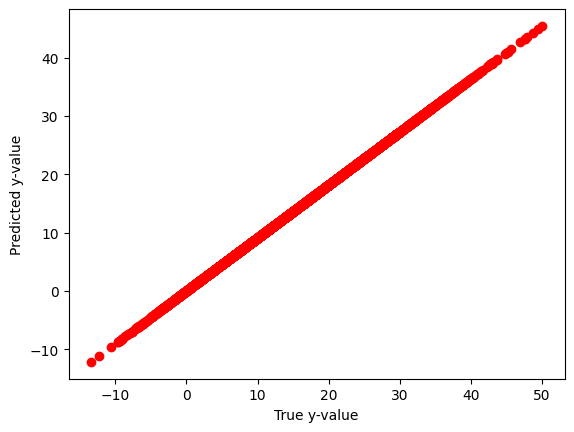

In [4]:
from sklearn.kernel_ridge import KernelRidge

# Kernel ridge regression with RBF
gamma=1000.
kernel_ridge_reg = KernelRidge(alpha=0.1, kernel='rbf', gamma=gamma)
kernel_ridge_reg.fit(X, y)
kernel_ridge_reg_pred = kernel_ridge_reg.predict(X)

#plt.scatter(X, y, label='Data')
plt.xlabel("True y-value")
plt.ylabel("Predicted y-value")
plt.scatter(y, kernel_ridge_reg_pred, color='red', label=f'Ridge Regression (gamma={gamma})')

# Extra tasks

- Produce a sythetic multivariate data-set (more than 4 independent variables) with all "x-values" in the range [0-2]. The data should have a single column for y-values and multiple column for the x-values. Generate the y-value such that there is a strong linear dependency in at-least one of the independent variables. You can have noise added as in the example given above (dont make the noise completely dominate your data!).

- Exchange your data set with a peer. But only a part where all x-values are in the range [0,1].

- Make use of the regression techniques above and try to contruct a effecient model that captures the data in faithful way.

- Predict (extrapolate) data in the region where some of the x-values are in the range [1,2].

- Exchange your extrapolated data with your peer.

- Asses how well you and your peer did in the extrapolation task. Discuss and decide on at-least one measure to assess the extrapolation quality.

# Generate a mesh using numpy...

In [4]:
span = np.linspace(0, 10, 100)
x1,x2=np.meshgrid(span,span)
x=np.array( [x1.flatten(),x2.flatten()] )

in pandas

In [5]:
import pandas as pd
span = np.linspace(0, 10, 100)
x1,x2=np.meshgrid(span,span)
x1_flat = x1.flatten()
x2_flat = x2.flatten()

data=pd.DataFrame({"x1":x1_flat,"x2":x2_flat})
data

,x1,x2
0,0.00000,0.0
1,0.10101,0.0
2,0.20202,0.0
3,0.30303,0.0
4,0.40404,0.0
...,...,...
9995,9.59596,10.0
9996,9.69697,10.0
9997,9.79798,10.0
9998,9.89899,10.0
